## Trench migration rate (Vt) dipendency from oceanic plate velocity (Vp) for a deep Earth interior problem with a sub-lithospheric layer
![alt](../img/SLL3D.png) 
## Goals:

    Implement Gradient Descent for Linear Regression, retrieve the values of w and b and make predictions on trench velocity.
    
Learn to implement the model  𝑓𝑤,𝑏 for linear regression 

In [4]:
# Import Libraries
import numpy as np
import math, copy
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_multi import plt_contour_wgrad, plt_divergence, plt_gradients

In [5]:
# Trench and Plate velocities obtained from 3D simulations
Vp_mag = np.array([
         4.6999851528309344,
         4.2751480911622135,
         3.6497913944973508,
         3.2736974878749741,
         6.4611815337388379,
         5.3561187289356731,
         4.5125663357343422,
         3.6241665283346278])

Vt     = np.array([
        -0.11995725,
        -0.36236586,
        -0.66254439,
        -0.96785037,
         0.99889706,
         0.3911321 ,
        -0.15118985,
        -0.78003195])

In [6]:
# x_train is the input variable (Vp in cm/yr)
# y_train is the target (Vt in cm/yr)
x_train = Vp_mag
y_train = Vt
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train = [4.69998515 4.27514809 3.64979139 3.27369749 6.46118153 5.35611873
 4.51256634 3.62416653]
y_train = [-0.11995725 -0.36236586 -0.66254439 -0.96785037  0.99889706  0.3911321
 -0.15118985 -0.78003195]
x_train.shape: (8,)
Number of training examples is: 8


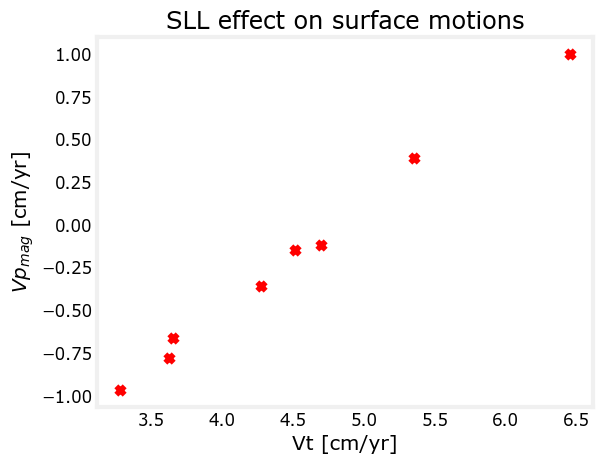

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("SLL effect on surface motions")
# Set the y-axis label
plt.ylabel('$Vp_{mag}$ [cm/yr]')
# Set the x-axis label
plt.xlabel('Vt [cm/yr]')
plt.show()

In [8]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [9]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [11]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.05e-01  dj_dw:  3.325e-01, dj_db:  2.067e-01   w: -3.325e-03, b:-2.06739e-03
Iteration 1000: Cost 8.56e-02  dj_dw: -1.793e-02, dj_db:  8.402e-02   w:  2.086e-01, b:-1.05744e+00
Iteration 2000: Cost 3.63e-02  dj_dw: -1.160e-02, dj_db:  5.436e-02   w:  3.539e-01, b:-1.73850e+00
Iteration 3000: Cost 1.57e-02  dj_dw: -7.507e-03, dj_db:  3.517e-02   w:  4.480e-01, b:-2.17916e+00
Iteration 4000: Cost 7.06e-03  dj_dw: -4.857e-03, dj_db:  2.276e-02   w:  5.088e-01, b:-2.46426e+00
Iteration 5000: Cost 3.44e-03  dj_dw: -3.143e-03, dj_db:  1.472e-02   w:  5.482e-01, b:-2.64873e+00
Iteration 6000: Cost 1.93e-03  dj_dw: -2.033e-03, dj_db:  9.527e-03   w:  5.736e-01, b:-2.76808e+00
Iteration 7000: Cost 1.30e-03  dj_dw: -1.315e-03, dj_db:  6.164e-03   w:  5.901e-01, b:-2.84529e+00
Iteration 8000: Cost 1.03e-03  dj_dw: -8.511e-04, dj_db:  3.988e-03   w:  6.008e-01, b:-2.89526e+00
Iteration 9000: Cost 9.23e-04  dj_dw: -5.507e-04, dj_db:  2.580e-03   w:  6.077e-01, b:-2.92758e+00


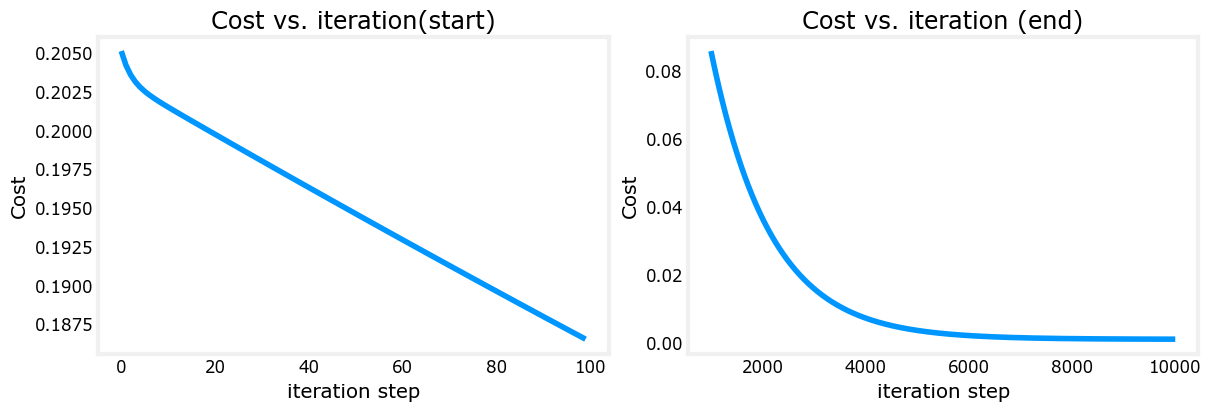

In [13]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

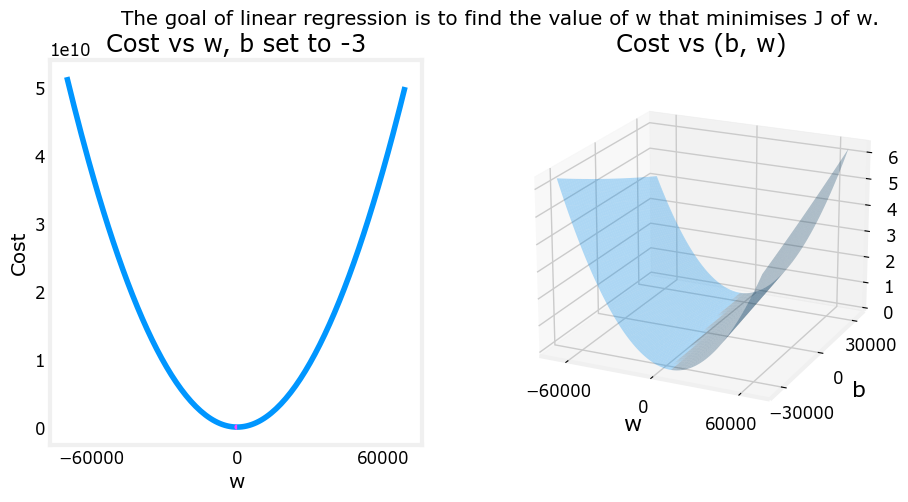

In [14]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

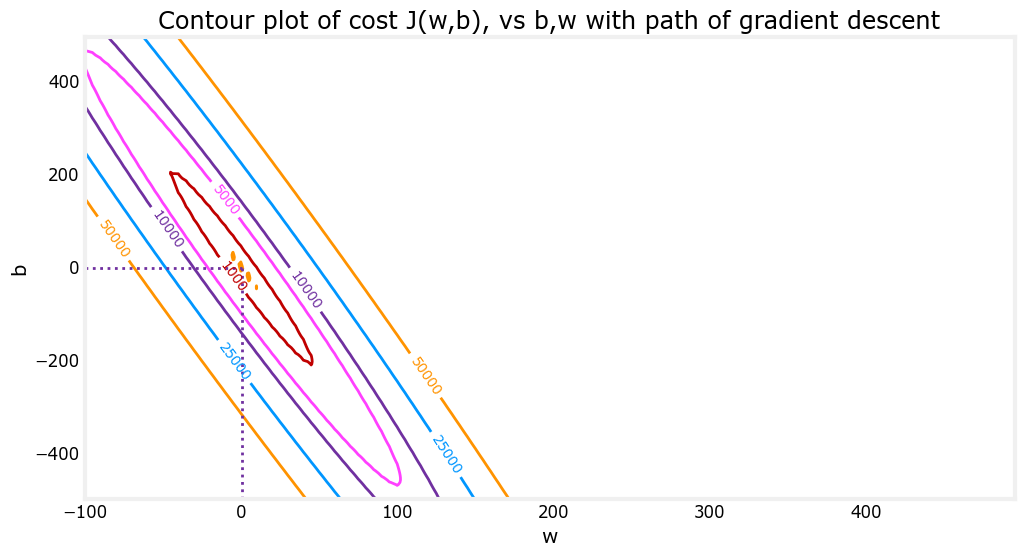

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

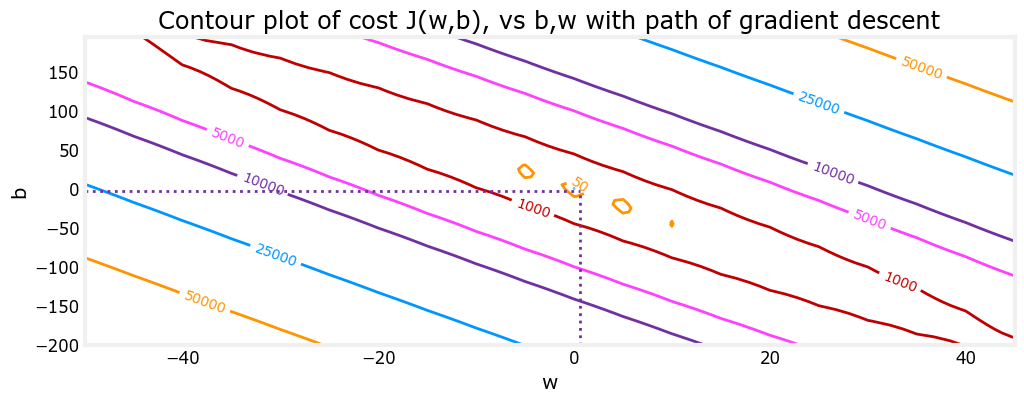

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[-50, 50, 5], b_range=[-200, 200, 5],
            contours=[0.1,50,1000,5000,10000,25000,50000],resolution=5, w_final=0.6, b_final=-3,step=10 )

# Model Prediction

In [17]:
print(f"For 6 cm/yr Vp, the trench velocity prediction is {w_final*6.0 + b_final:0.1f} [cm/yr]")
print(f"For 5 cm/yr Vp, the trench velocity prediction is {w_final*5.0 + b_final:0.1f} [cm/yr]")
print(f"For 2 cm/yr Vp, the trench velocity prediction is {w_final*2.0 + b_final:0.1f} [cm/yr]")

For 6 cm/yr Vp, the trench velocity prediction is 0.7 [cm/yr]
For 5 cm/yr Vp, the trench velocity prediction is 0.1 [cm/yr]
For 2 cm/yr Vp, the trench velocity prediction is -1.7 [cm/yr]


In [18]:
# Create array of predicted value
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] + b_final

Text(0.5, 0, '$Vp_{mag}$ [cm/yr]')

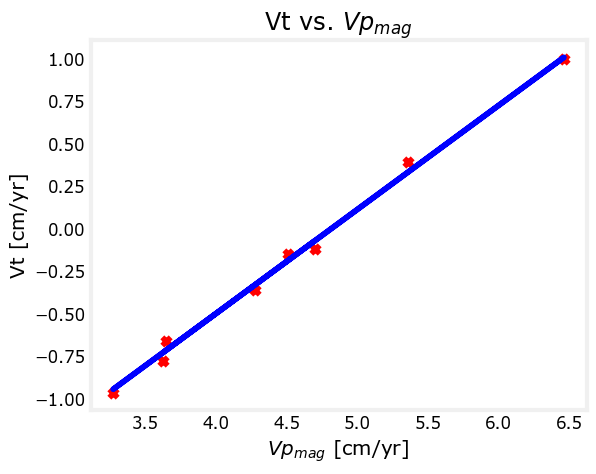

In [19]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Vt vs. $Vp_{mag}$")
# Set the y-axis label
plt.ylabel('Vt [cm/yr]')
# Set the x-axis label
plt.xlabel('$Vp_{mag}$ [cm/yr]')